In [1]:
import numpy as np
import pandas as pd # data_frame
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno # 데이터에서 널 값을 채워줌

#ignore warnings # 경고들을 무시,
import warnings
warnings.filterwarnings('ignore')

#matplotlib을 사용해서 보여주면 새로운 창이 나오는데 이 노트북에 나오도록 하는 함수
%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
# 널 데이터 확인
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


- isnull() : 널 데이터면 True 아니면 False (데이터가 존재)
- sum() : 모두 합침, True는 1, False는 0
- shape() : 차원의 형태 표시, df_train[col].shape[0]))는 col의 행열 (890,)으로 표시

In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

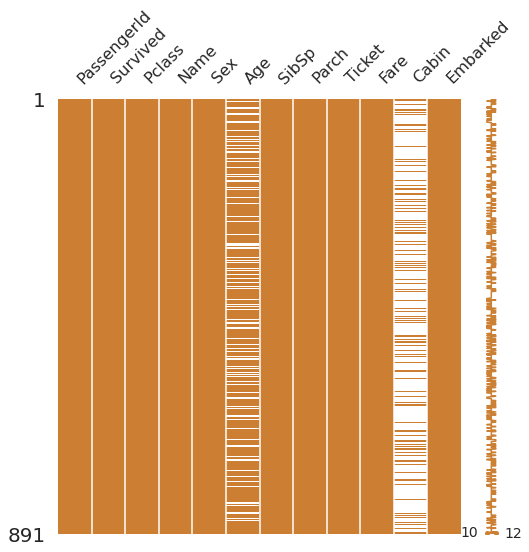

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # figsize = (크기)

<AxesSubplot:>

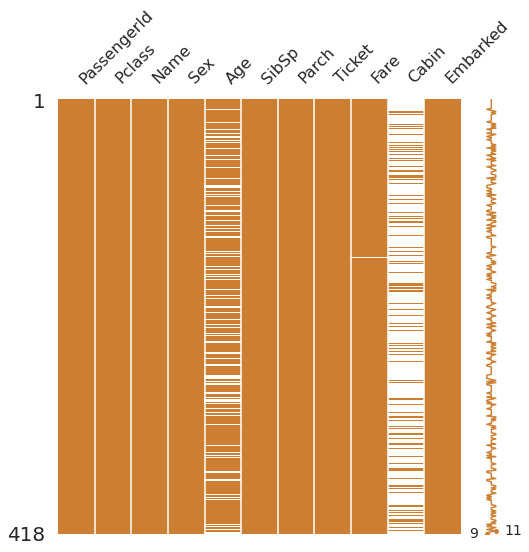

In [9]:
msno.matrix(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # color (Red, Green, Blue)

- 속성을 확인

- autopct : 퍼센트로 나타남
- ax : 각 그래프 순서,  아마 열을 나타내는것 같음, 그럼 f는 아마도 행이겠지
- countplot :  seaborn의 함수

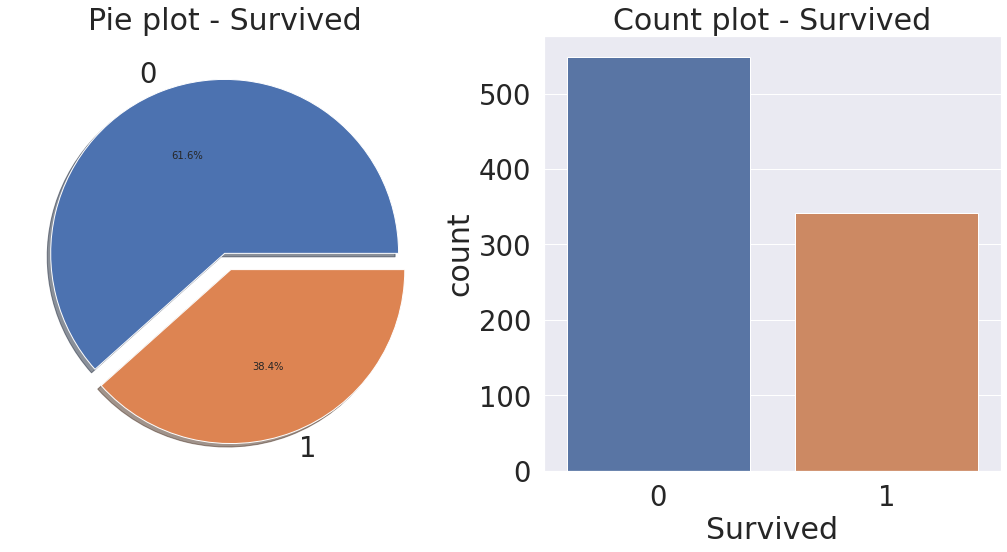

In [10]:
f, ax = plt.subplots(1, 2, figsize= (18, 8)) # subplots(Row, Column, figsize), 그래프 나타냄

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True) 
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax=ax[1]) # (column중 하나, 데이터 원본, 나타내는 위치)
ax[1].set_title('Count plot - Survived')

plt.show()

In [11]:
df_train['Survived'].value_counts() # pands의 특성 1, 시리즈로 표시, value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
df_train['Survived'] # 시리즈들은 plots들을 가지고 있음

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

- 시리즈들은 plots들을 가지고 있음
- df_train['Survived'].value_counts().plot() = plt.plot(df_train['Survived'].value_counts())
- 같은 의미
- 데이터 분석 시작
- 그림은 누구나 그릴줄 암, 내가 원하는 것을 표현하기 위한 그림을 그릴줄 알아야 함

### **2.1 Pclass**
- Pclass : 여기선 객실의 등수, ex) 1등급, 2등급 ..
- class 에 대해서 살펴보겠습니다. Pclass 는 ordinal, 서수형 데이터입니다.
- 카테고리이면서, 순서가 있는 데이터 타입입니다.

In [13]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).count()
# groupby(['특성']), .sum(), .count() 등 여러 메서드를 가지고 있음
# df_train[[]] : 이중 리스트로 묶어야 함!!

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins= True).style.background_gradient(cmap='cool')
# margin : All 포함 여부
# style.background_gradient : 기울어진 정도에 따라 배경색을 바꿈

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- 

In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

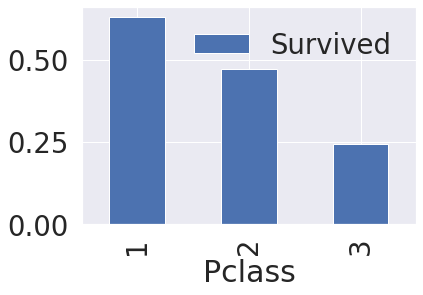

In [17]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar()
# ascending : 오름, 내림차순 결정
# # sort_values : 정렬 메소드 (by : 'Survived') - Survived를 기준으로 정렬

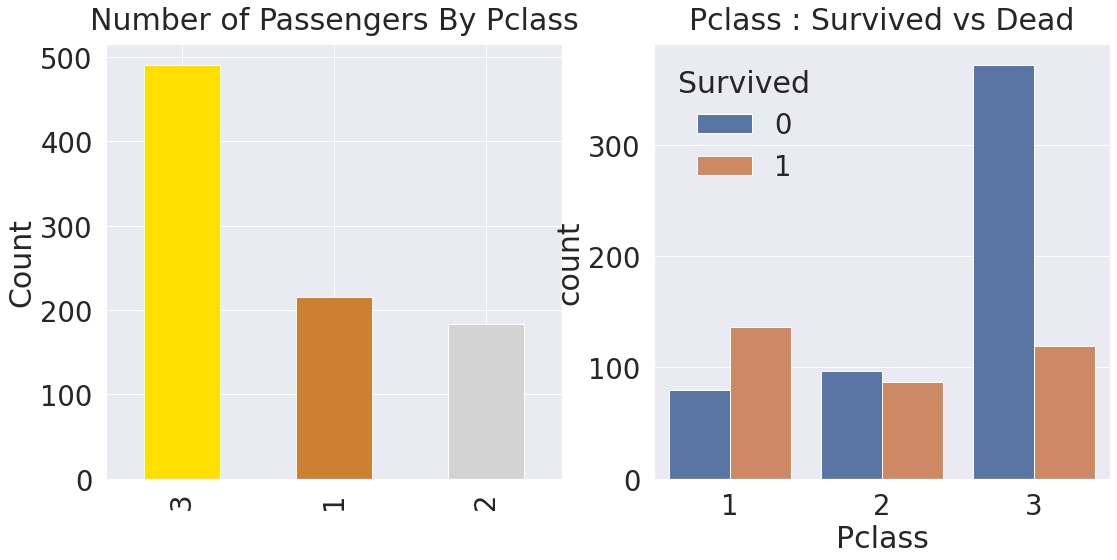

In [18]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#FFDF00','#CD7F32','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass',  y = y_position)  # 제목 위치가 살짝 올라감
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax=ax[1]) # hue를 기준으로 나눠서 표현 및 색칠해라
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

**2.2 Sex**

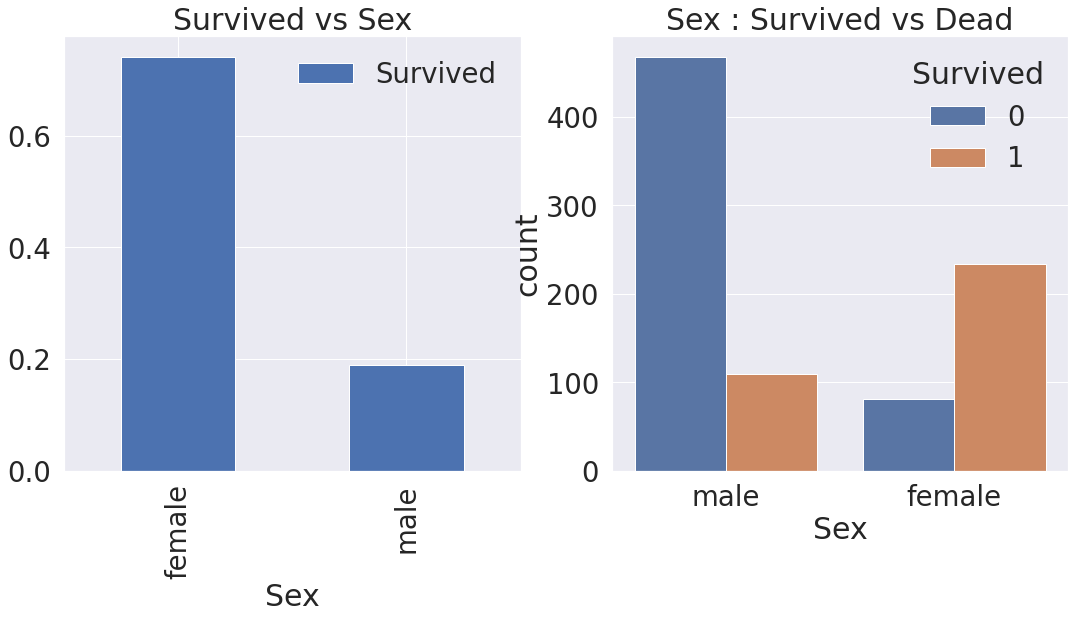

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1]) # (어떤 컬럼을 기준, 색깔은 무엇을 기준으로, 데이터는 무엇으로,)
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

In [20]:
pd.crosstab(df_train['Sex'], df_train['Survived'],margins = True).style.background_gradient(cmap='cool')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [21]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = False).style.background_gradient(cmap='cool')

Survived,0,1
Sex,,
female,81,233
male,468,109


- 이처럼 'hue' 라는 속성에 정량적데이터(숫자)가 아닌 범주형데이터 ( yes or no ) 를 입력해 그래프에 서로 다른 색깔로 표시되게 할 수 있습니다. ( 초콜릿이 들어있는 캔디가 압도적으로 선호도가 높은 걸 알 수 있습니다 )

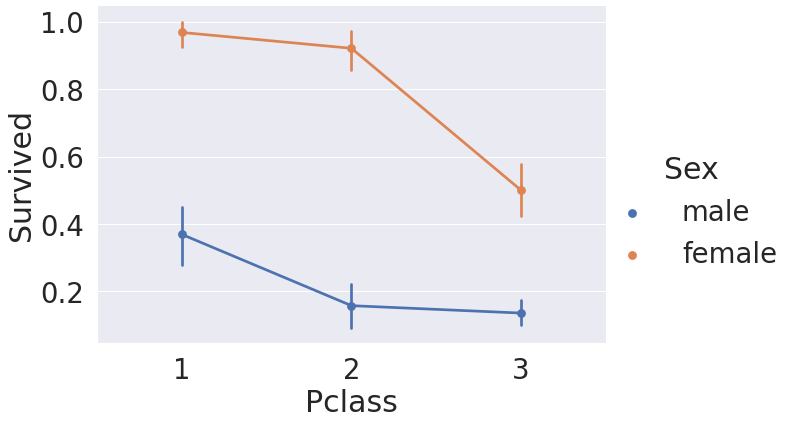

In [22]:
sns.factorplot('Pclass','Survived', hue = 'Sex', data = df_train, size = 6, aspect =1.5)

- factorplot : (column, hue, data, size, aspect)

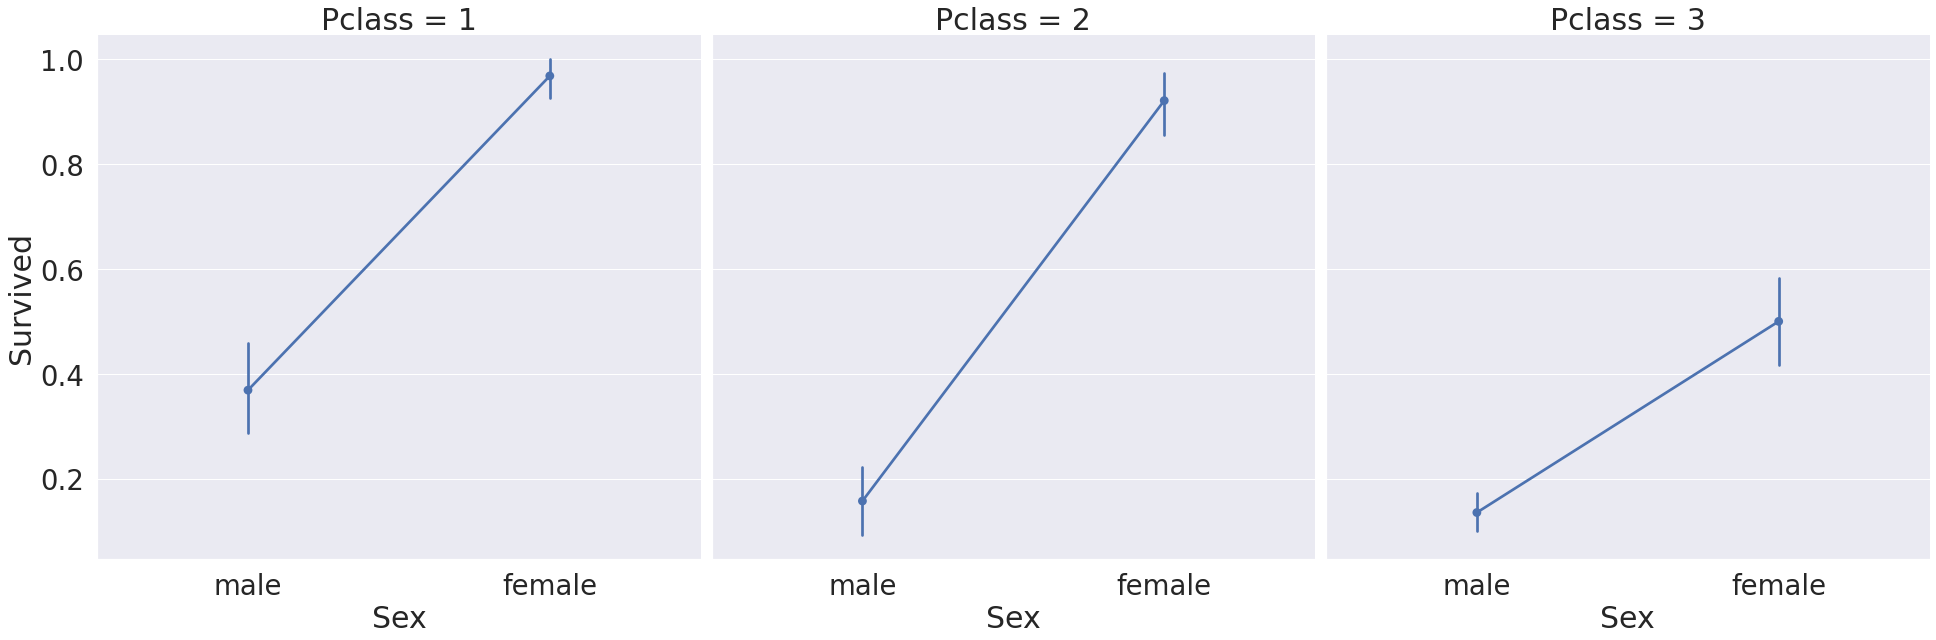

In [23]:
sns.factorplot(x = 'Sex',y ='Survived',col = 'Pclass',data = df_train, size = 9, aspect = 1)

- 그래프 양 끝점에 생기는 세로 막대 : 에러바
- 에러바 : 신뢰도를 의미
- 보통 표준편차를 사용. 

# Age

In [24]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


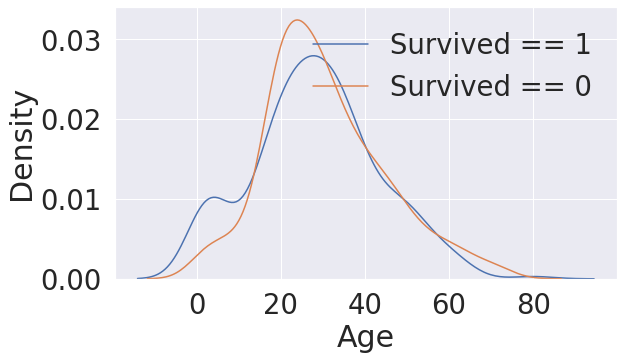

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()